In [1]:
import read_data
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = read_data.create_frame()
print(df)

       object_name          seq_name num_of_sequences sequence_len cycle  \
0           BRUMC1            BRUMC1                1            8         
1           BRUMC2            BRUMC2                1            2     a   
2           BRUMC3            BRUMC3                1            2     a   
3           BRUMC4            BRUMC4                1            2     a   
4           COLA02            COLA02                1            8         
..             ...               ...              ...          ...   ...   
250  MUNSA-0007688     MUNSA-0007688                1            8     0   
251  MUNSA-0007686     MUNSA-0007686                1           10     0   
252   HMV-63.54.12   HMV-63.54.12inf                2           16     0   
253   HMV-63.54.12  HMV-63.54.12cent                2           16     0   
254         COLA27            COLA27                1            6     a   

                                       sequence_values  scenes  
0    [B.27.23.B.30, A.

sequence_len
1       2
2     106
3       1
4      34
5       9
6      16
7       4
8      46
9       8
10      7
11     11
12      3
13      2
16      6
Name: count, dtype: int64


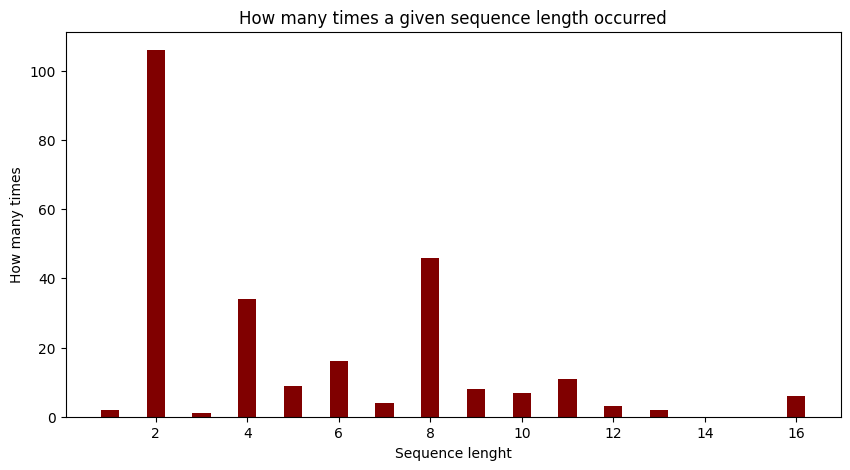

In [3]:
# How many sequences have given lenght
lengths = pd.to_numeric(df["sequence_len"])
sorted_counts = lengths.value_counts().sort_index()
print(sorted_counts)

fig = plt.figure(figsize = (10, 5))

plt.bar(sorted_counts.keys(), sorted_counts.values, color ='maroon',  width = 0.4)

plt.xlabel("Sequence lenght")
plt.ylabel("How many times")
plt.title("How many times a given sequence length occurred")
plt.savefig("plots/sequence_lenghts")
plt.show()


{'': 62, 'a': 137, '0': 56}


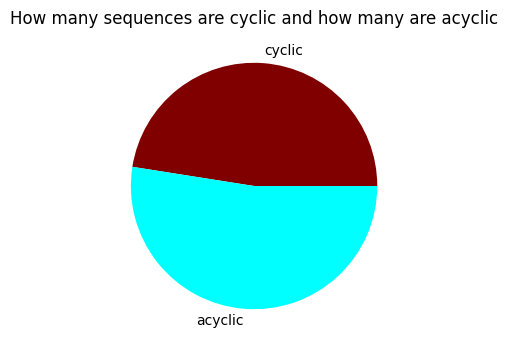

In [4]:
# How many sequenes are cycle or not
cycles = df['cycle']

cycle_dict = dict(Counter(cycles))

titles = ["cyclic", "acyclic"]
print(cycle_dict)
data = [cycle_dict[''] + cycle_dict[''], cycle_dict['a']]


fig = plt.figure(figsize=(7, 4))
plt.pie(data, labels=titles, colors=['maroon', 'cyan'])
plt.title("How many sequences are cyclic and how many are acyclic")
plt.savefig("plots/cyclic_acyclic")
plt.show()

In [27]:
# for object how many scenes and sequences

object_values = {}
scenes_in_objects = {}

for key in df['object_name'].unique():
    filtered_row = df.loc[df['object_name'] == key].iloc[0]
    key_d = filtered_row['object_name']
    num_seq = filtered_row['num_of_sequences']
    num_scenes = filtered_row['scenes']

    object_values[key_d] = {
        'num_seq': int(num_seq),
        'num_scens': len(num_scenes) if num_scenes is not None else 0}

    if num_scenes is not None:
        for scene in num_scenes:
            if int(scene) in scenes_in_objects.keys():
                scenes_in_objects[int(scene)] += 1
            else:
                scenes_in_objects[int(scene)] = 1

{1: 8, 2: 1, 3: 24, 4: 20, 5: 5, 6: 11, 7: 2, 8: 2, 9: 9, 10: 10, 11: 18, 12: 14, 13: 42, 14: 26, 15: 2, 16: 8, 17: 3, 18: 1, 19: 1, 20: 1}


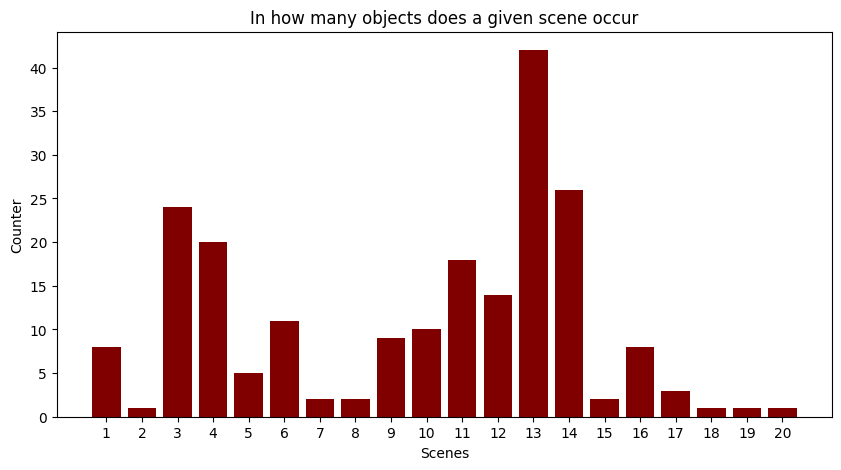

In [26]:
# which scenes are on most of the objects
sorted_scenes = dict(sorted(scenes_in_objects.items(), key=lambda item:  item[0]))
print(sorted_scenes)

plt.figure(figsize=(10, 5))
plt.bar(sorted_scenes.keys(), sorted_scenes.values(), color="maroon")
plt.xticks(list(sorted_scenes.keys()))
plt.xlabel("Scenes")
plt.ylabel("Counter")
plt.title("In how many objects does a given scene occur")

plt.savefig("plots/counts_scenes")
plt.show()

In [ ]:
# Scenes to analyze occured more than one or two
#{1: 8, 3: 24, 4: 20, 5: 5, 6: 11, 9: 9, 10: 10, 11: 18, 12: 14, 13: 42, 14: 26, 16: 8}

In [8]:
# how many objects
unique_objects = df['object_name'].unique()
print(len(unique_objects))

223


Counter({1: 197, 2: 21, 3: 4, 4: 1})


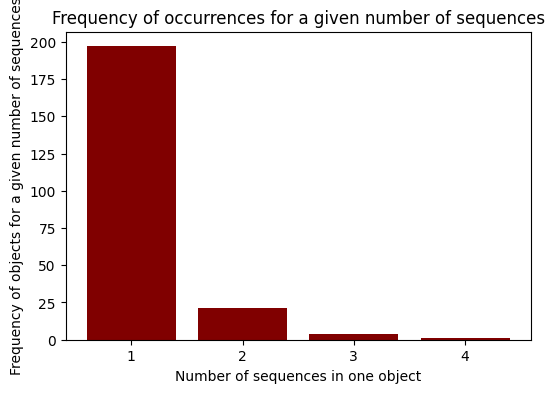

In [9]:
num_seq = [object_values[key]["num_seq"] for key in object_values.keys()]
count_num_seq = Counter(num_seq)

print(count_num_seq)
fig = plt.figure(figsize = (6, 4))

plt.bar(count_num_seq.keys(), count_num_seq.values(), color ='maroon')

plt.xticks(list(count_num_seq.keys()))
plt.xlabel("Number of sequences in one object")
plt.ylabel("Frequency of objects for a given number of sequences")
plt.title("Frequency of occurrences for a given number of sequences")
plt.savefig("plots/sequence_count")
plt.show()

Counter({1: 158, 0: 41, 2: 22, 3: 2})


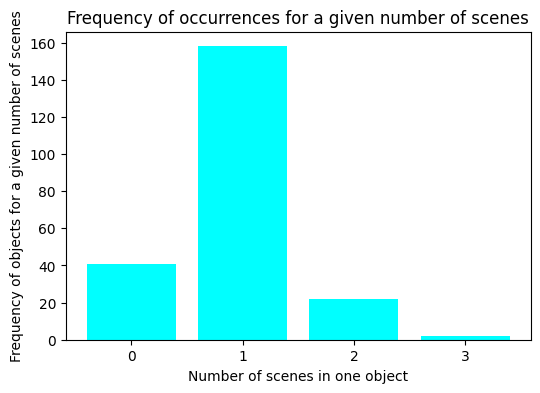

In [10]:
num_scenes = [object_values[key]["num_scens"] for key in object_values.keys()]
count_num_scenes = Counter(num_scenes)

print(count_num_scenes)
fig = plt.figure(figsize = (6, 4))

plt.bar(count_num_scenes.keys(), count_num_scenes.values(), color = 'cyan')

plt.xticks(list(count_num_scenes.keys()))
plt.xlabel("Number of scenes in one object")
plt.ylabel("Frequency of objects for a given number of scenes")
plt.title("Frequency of occurrences for a given number of scenes")
plt.savefig("plots/scenes_count")
plt.show()

(1, 1) występuje 143 razy
(1, 2) występuje 19 razy
(1, 0) występuje 34 razy
(1, 3) występuje 1 razy
(2, 1) występuje 13 razy
(2, 3) występuje 1 razy
(2, 2) występuje 3 razy
(2, 0) występuje 4 razy
(3, 0) występuje 2 razy
(3, 1) występuje 2 razy
(4, 0) występuje 1 razy


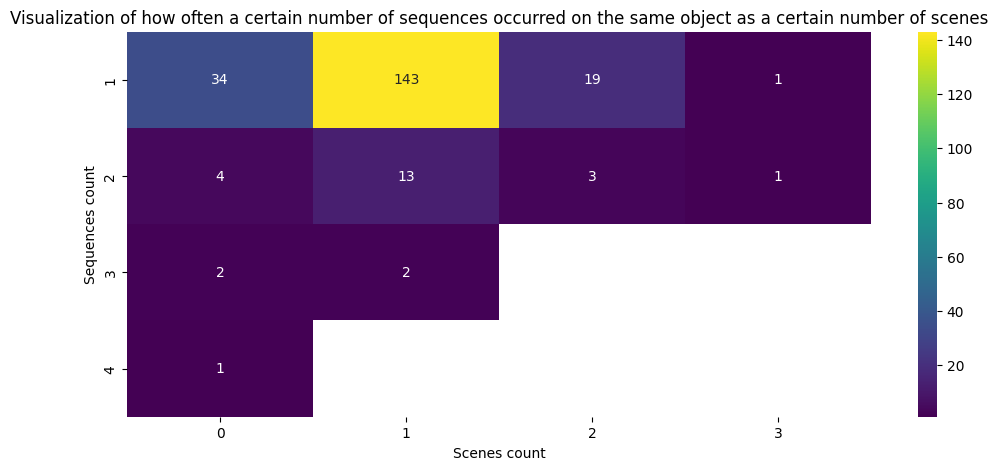

In [11]:

pairs = [(object_values[key]['num_seq'], object_values[key]['num_scens']) for key in object_values.keys()]

counter = Counter(pairs)

for pair, count in counter.items():
    print(pair, "występuje", count, "razy")

num_seq = [pair[0] for pair, count in counter.items()]
num_scenes = [pair[1] for pair, count in counter.items()]
count = [count for pair, count in counter.items()]

data = {'Sequences count': num_seq, 'Scenes count': num_scenes, 'count': count}
heat_data = pd.DataFrame(data)

fig = plt.figure(figsize = (12, 5))
sns.heatmap(data=heat_data.pivot(index='Sequences count', columns='Scenes count', values='count'), annot=True, cmap='viridis', fmt='.0f')

plt.title('Visualization of how often a certain number of sequences occurred on the same object as a certain number of scenes')
plt.savefig("plots/scenes_sequences_count")
plt.show()

In [ ]:
# TO do idk how for every scene - what signs are in sequence on the same object/ for every scene how many sequences/ or sum lens